In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
data=pd.read_excel(r'DATA.xlsx') 

In [3]:
data.tail()

,Date,HOUR,KP,DST,TEC,Class
1459,24-10-13,19,0,8,15.26,4
1460,24-10-13,20,0,7,14.43,4
1461,24-10-13,21,0,5,13.59,4
1462,24-10-13,22,0,2,12.39,4
1463,24-10-13,23,0,-2,11.14,4


In [4]:
data['Class'].unique()

array([2, 4], dtype=int64)

In [5]:
data.shape

(1464, 6)

In [6]:
e = Earthquake=data[data['Class']==2][0:200]
e['Class'].unique()

array([2], dtype=int64)

<AxesSubplot:xlabel='KP', ylabel='TEC'>

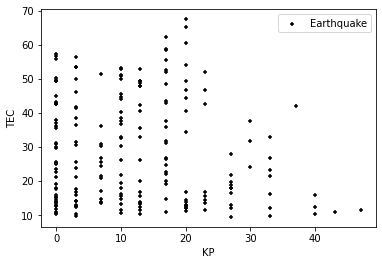

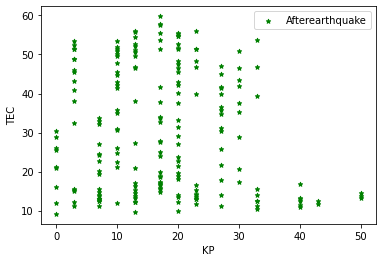

In [7]:
Earthquake=data[data['Class']==2][0:200]
Earthquake_data=data[data['Class']==4][0:200]
Earthquake.plot(kind='scatter' , x='KP', y='TEC',color='black',label='Earthquake',marker= '+')
Earthquake_data.plot(kind='scatter' , x='KP', y='TEC',color='green',label='Afterearthquake',marker= '*')

<AxesSubplot:xlabel='DST', ylabel='TEC'>

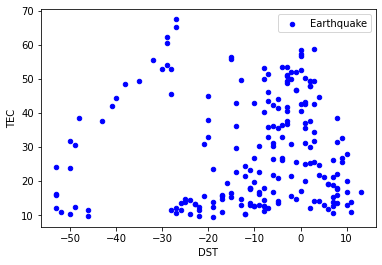

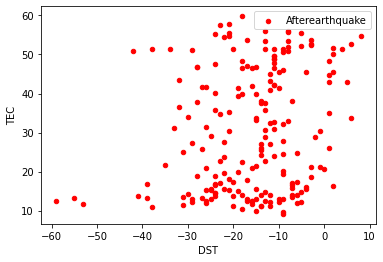

In [8]:
Earthquake=data[data['Class']==2][0:200]
Earthquake_data=data[data['Class']==4][0:200]
Earthquake.plot(kind='scatter' , x='DST', y='TEC',color='blue',label='Earthquake')
Earthquake_data.plot(kind='scatter' , x='DST', y='TEC',color='red',label='Afterearthquake')

In [9]:
data.dtypes

Date      object
HOUR       int64
KP         int64
DST        int64
TEC      float64
Class      int64
dtype: object

In [10]:
data.columns
feature_df=data[['HOUR','KP','DST','TEC']]
X=np.asarray(feature_df)
y=np.asarray(data['Class'])
y[0:5]

array([2, 2, 2, 4, 4], dtype=int64)

In [11]:
data.columns
feature_df_1=data[['DST','TEC']]
X_1=np.asarray(feature_df_1)
y_1=np.asarray(data['Class'])

In [12]:
data.columns
feature_df_2=data[['KP','TEC']]
X_2=np.asarray(feature_df_2)
y_2=np.asarray(data['Class'])

In [13]:
X_1.shape

(1464, 2)

In [14]:
#multiclass classification using support vector classifier

#module needed
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from numpy import random, meshgrid
from numpy import c_
from matplotlib.pyplot import *
from sklearn.svm import *

In [15]:
#split the data 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size=0.8, random_state = 0)
linear = SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train_1, y_train_1)

In [18]:
#split the data 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size=0.8, random_state = 0)
rbf = SVC(kernel='rbf', C=1, decision_function_shape='ovo').fit(X_train_2, y_train_2)

In [19]:
from numpy import *
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min_1, x_max_1 = X_1[:, 0].min() - 1, X_1[:, 0].max() + 1
y_min_1, y_max_1 = X_1[:, 1].min() - 1, X_1[:, 1].max() + 1
xx_1, yy_1 = meshgrid(arange(x_min_1, x_max_1, h),arange(y_min_1, y_max_1, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

<ipython-input-20-1083517de539>:4: UserWarning: The following kwargs were not used by contour: 'label'
  contourf(xx_1, yy_1, Z, cmap=cm.PuBuGn, alpha=0.7, label='nonlinear prediction')


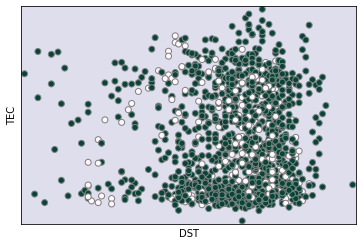

In [20]:
Z = rbf.predict(c_[xx_1.ravel(), yy_1.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx_1.shape)
contourf(xx_1, yy_1, Z, cmap=cm.PuBuGn, alpha=0.7, label='nonlinear prediction')
# Plot also the training points
scatter(X_1[:, 0], X_1[:, 1], c=y, cmap=cm.PuBuGn,     edgecolors='grey')
xlabel('DST')
ylabel('TEC')
xlim(xx_1.min(), xx_1.max())
ylim(yy_1.min(), yy_1.max())
xticks(())
yticks(())
show()

In [21]:

h = .01
#create the mesh
x_min_2, x_max_2 = X_2[:, 0].min() - 1, X_2[:, 0].max() + 1
y_min_2, y_max_2 = X_2[:, 1].min() - 1, X_2[:, 1].max() + 1
xx_2, yy_2 = meshgrid(arange(x_min_2, x_max_2, h),arange(y_min_2, y_max_2, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

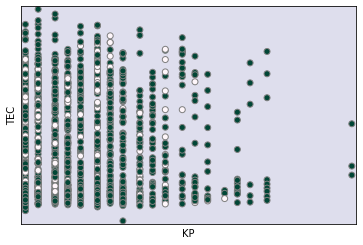

In [22]:
Z_2 = linear.predict(c_[xx_2.ravel(), yy_2.ravel()])
# Put the result into a color plot
Z_2 = Z_2.reshape(xx_2.shape)
contourf(xx_2, yy_2, Z_2, cmap=cm.PuBuGn, alpha=0.7)
# Plot also the training points
scatter(X_2[:, 0], X_2[:, 1], c=y, cmap=cm.PuBuGn,     edgecolors='grey', label='linear prediction')
xlabel('KP')
ylabel('TEC')
xlim(xx_2.min(), xx_2.max())
ylim(yy_2.min(), yy_2.max())
xticks(())
yticks(())
show()